In [14]:
import math
import timeit
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np

In [27]:
@dataclass
class Gen:
    fitness_best: int
    fitness_avg: float

    def __init__(self, best, avg):
        self.fitness_best = best
        self.fitness_avg = avg


class Evolution():
    def __init__(self, max, size, base):
        self.size = size
        self.max = max
        self.base = base
        self.generations = []
        self.start_generation = np.random.randint(0, max, size=size)
        self.generations.append(self.start_generation)
        self.target = np.random.randint(0, max)

        # Mutation method
    def mutate(self, x: int):
        start = np.random.randint(0, math.floor(self.base/2))
        end = np.random.randint(start, math.floor(self.base))
        parent_1 = str(bin(x))[2:]

        if len(parent_1) != self.base:
            for i in range(self.base-len(parent_1)):
                parent_1 = '0' + parent_1

        parent_1 = list(parent_1)
        for i in range(start, end):
            parent_1[i] = '1' if parent_1[i] == '0' else '0'

        return int(''.join(parent_1), 2)

        # Selected parent one and two makes child
    def make_child(self, x, y):
        random = np.random.randint(0, 2)
        parent_1 = str(bin(x if random == 0 else y))[2:]
        parent_2 = str(bin(x if random == 1 else y))[2:]
        i = 0
        if len(parent_1) % 2 == 0:
            i = len(parent_1) / 2
        else:
            if self.fitness(x if random == 0 else y) > self.fitness(x if random == 1 else y):
                i = math.ceil(len(parent_1) / 2)
            else:
                i = math.floor(len(parent_1) / 2)

        i = int(i)
        child = parent_1[:i]+parent_2[i:]
        
        return int(child, 2)
    
        # Selects the best parents to make a child
    def get_new_combination(self, gen: zip):
        new_gen = []
        t = 0
        best = 0
        second = 0

        for i in range(len(gen)):
            if best > gen[i][0] > second != gen[i][1]:
                second = gen[i][1]

            if gen[i][0] > best != gen[i][1]:
                second = best
                best = gen[i][1]

        for i in gen:
            new_gen.append(self.make_child(i[1], best))
            new_gen.append(self.make_child(i[1], second))

        return new_gen
    
        # Makes continues
    def get_new_generation(self, old_gen):
        new_gen = self.get_new_combination(old_gen)

        for i in np.random.randint(0, self.size, size=math.floor(self.size/2)):
            new_gen[i] = self.mutate(new_gen[i])

        return new_gen
    
        # Fitness function
    def fitness(self, x: int):
        return -np.abs(x - self.target)

        # Runtime 
    def run_time(self):
        i = 0
        sts = []

        for t in range(20):
            start = timeit.default_timer()
            while True:

                fitness_list = [self.fitness(x) for x in self.generations[i]]
                
                gen = sorted(zip(fitness_list, self.generations[i]), reverse=True)[:(math.floor(self.size/2))]
                if max(fitness_list) == 0:
                    stop = timeit.default_timer()
                    sts.append(stop-start)
                    break
                    
                new_gen = self.get_new_generation(gen)
                self.generations.append(new_gen)

                i += 1

        return sum(sts)/len(sts)

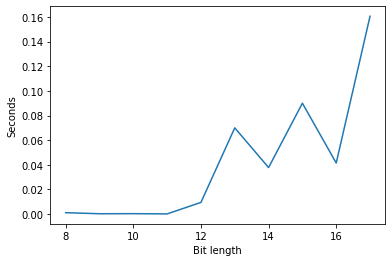

In [29]:
n = np.arange(8, 18)
time  = []

for i in range(8, 18):
    evo = Evolution(2**i, 20, i)
    time.append(evo.run_time())
    # print(f"Done with: {2**i}")
    # print(f"Target: {evo.target}")
plt.xlabel("Bit length")
plt.ylabel("Seconds")
plt.plot(n, time)
plt.show()